In [6]:
# ================================================================
# 01_data_exploration.ipynb
# Exploratory Data Analysis (EDA) for Singapore Rainfall Dataset
# ================================================================

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
RAW_PATH = "../data/raw/sg_rainfall_raw.json"
CSV_PATH = "../data/processed/sg_rainfall_processed.csv"

# Plotting style
plt.style.use("seaborn-v0_8")
sns.set_context("talk")


# Load Data

In [7]:
# Load processed CSV
df = pd.read_csv(CSV_PATH, parse_dates=["timestamp"])
df.set_index("timestamp", inplace=True)

print("Processed dataframe shape:", df.shape)
df.head()


Processed dataframe shape: (23208, 80)


,"1.2200,103.6000","1.2200,103.6500","1.2200,103.7000","1.2200,103.7500","1.2200,103.8000","1.2200,103.8500","1.2200,103.9000","1.2200,103.9500","1.2200,104.0000","1.2200,104.0500",...,"1.4700,103.6000","1.4700,103.6500","1.4700,103.7000","1.4700,103.7500","1.4700,103.8000","1.4700,103.8500","1.4700,103.9000","1.4700,103.9500","1.4700,104.0000","1.4700,104.0500"
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 01:00:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 02:00:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 03:00:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 04:00:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Load raw JSON (metadata only)
with open(RAW_PATH, "r") as f:
    raw = json.load(f)

print("Keys:", raw.keys())
print("Number of points:", len(raw["points"]))


Keys: dict_keys(['meta', 'points'])
Number of points: 80


# Data Inspection

In [10]:
# Info and missing values
df.info()
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False).head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23208 entries, 2023-01-01 00:00:00+08:00 to 2025-08-24 23:00:00+08:00
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1.2200,103.6000  23208 non-null  float64
 1   1.2200,103.6500  23208 non-null  float64
 2   1.2200,103.7000  23208 non-null  float64
 3   1.2200,103.7500  23208 non-null  float64
 4   1.2200,103.8000  23208 non-null  float64
 5   1.2200,103.8500  23208 non-null  float64
 6   1.2200,103.9000  23208 non-null  float64
 7   1.2200,103.9500  23208 non-null  float64
 8   1.2200,104.0000  23208 non-null  float64
 9   1.2200,104.0500  23208 non-null  float64
 10  1.2557,103.6000  23208 non-null  float64
 11  1.2557,103.6500  23208 non-null  float64
 12  1.2557,103.7000  23208 non-null  float64
 13  1.2557,103.7500  23208 non-null  float64
 14  1.2557,103.8000  23208 non-null  float64
 15  1.2557,103.8500  23208 non-null  float64
 16  1.2557,103.

In [11]:
# Time coverage
print("Start:", df.index.min())
print("End:", df.index.max())
print("Total hours:", len(df))


Start: 2023-01-01 00:00:00+08:00
End: 2025-08-24 23:00:00+08:00
Total hours: 23208


# Temporal Data Exploration

In [15]:
# Global dark theme for the rest of the notebook
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")
sns.set_context("talk")

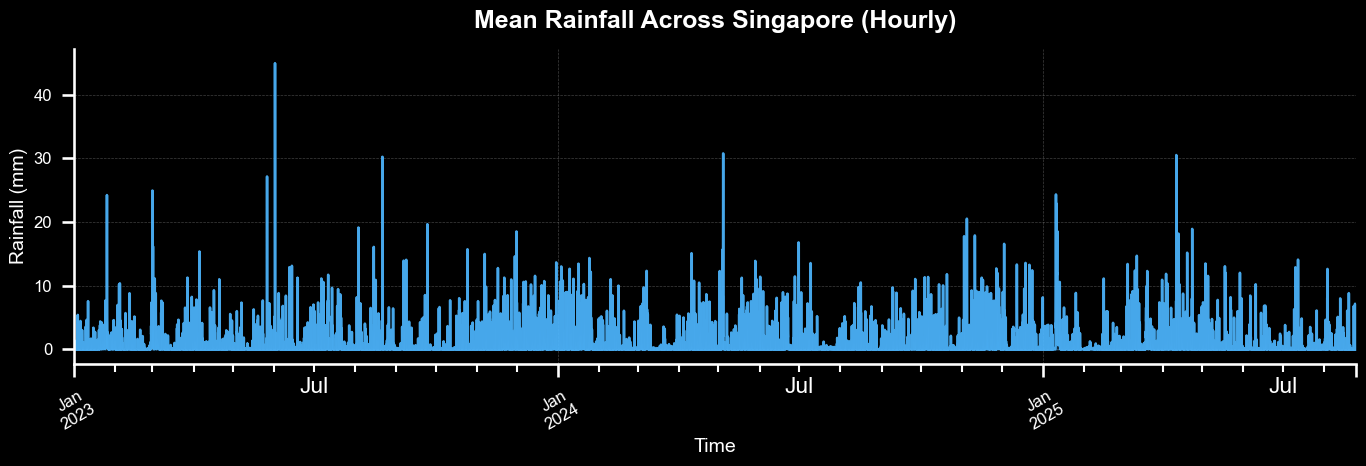

In [16]:
# --- Total / mean rainfall across SG per hour ---
fig, ax = plt.subplots(figsize=(14,5))

# Plot line + shaded area
df["mean_rainfall"].plot(
    ax=ax,
    color="#4DB6FF",       # bright cyan/blue line
    linewidth=1.8,
    alpha=0.9
)
ax.fill_between(df.index, df["mean_rainfall"], color="#4DB6FF", alpha=0.2)

# Titles and labels
ax.set_title("Mean Rainfall Across Singapore (Hourly)", fontsize=18, weight="bold", pad=15)
ax.set_ylabel("Rainfall (mm)", fontsize=14)
ax.set_xlabel("Time", fontsize=14)

# Gridlines
ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)

# Tick labels
ax.tick_params(axis="x", labelsize=12, rotation=30)
ax.tick_params(axis="y", labelsize=12)

# Remove top/right spines for cleaner look
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

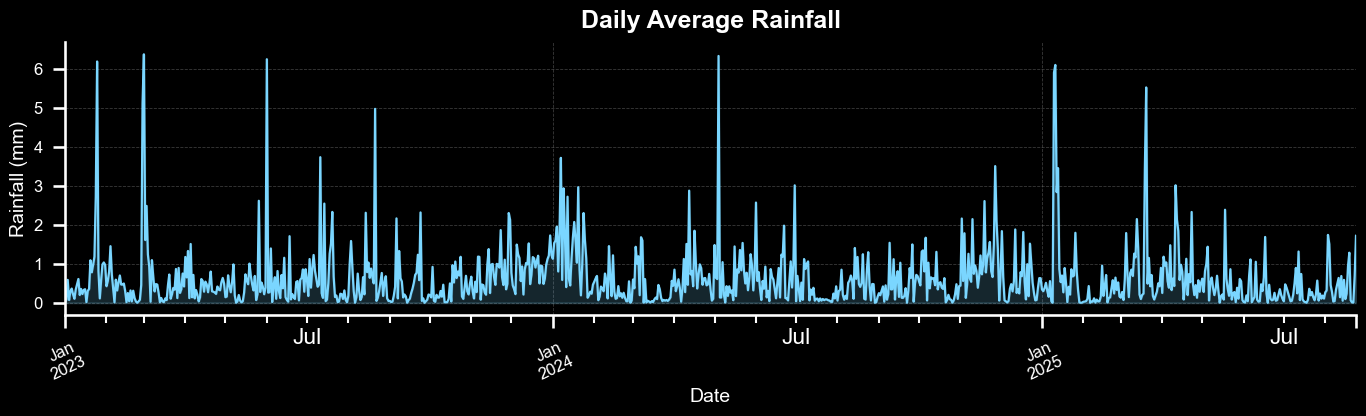

In [17]:
# --- Daily average rainfall ---
daily = df["mean_rainfall"].resample("D").mean()

fig, ax = plt.subplots(figsize=(14,4.5))
daily.plot(ax=ax, color="#7AD6FF", linewidth=1.6)
ax.fill_between(daily.index, daily, color="#7AD6FF", alpha=0.18)

ax.set_title("Daily Average Rainfall", fontsize=18, weight="bold", pad=10)
ax.set_ylabel("Rainfall (mm)", fontsize=14)
ax.set_xlabel("Date", fontsize=14)
ax.grid(color="gray", linestyle="--", linewidth=0.6, alpha=0.45)
ax.tick_params(axis="x", labelsize=12, rotation=25)
ax.tick_params(axis="y", labelsize=12)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()

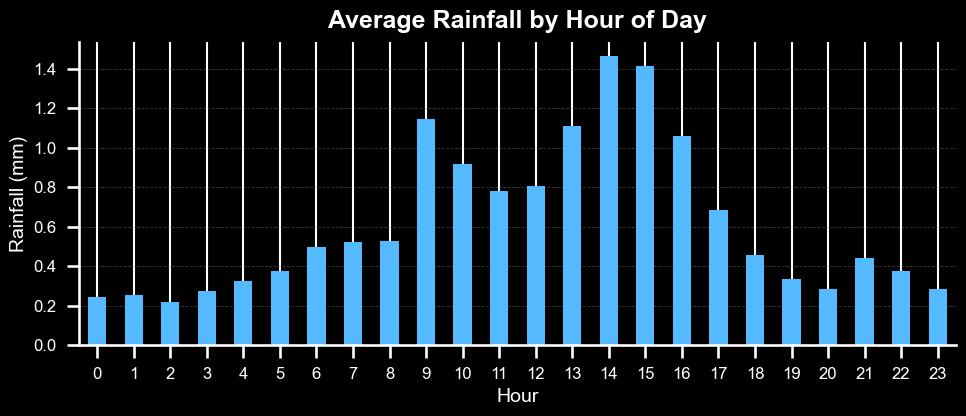

In [18]:
# --- Hour-of-day climatology (mean over entire dataset) ---
df["hour"] = df.index.hour
hourly_pattern = df.groupby("hour")["mean_rainfall"].mean()

fig, ax = plt.subplots(figsize=(10,4.5))
hourly_pattern.plot(kind="bar", ax=ax, color="#54B9FF", edgecolor="none")

ax.set_title("Average Rainfall by Hour of Day", fontsize=18, weight="bold", pad=10)
ax.set_xlabel("Hour", fontsize=14)
ax.set_ylabel("Rainfall (mm)", fontsize=14)
ax.grid(axis="y", color="gray", linestyle="--", linewidth=0.6, alpha=0.45)
ax.tick_params(axis="x", labelsize=12, rotation=0)
ax.tick_params(axis="y", labelsize=12)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()

# Spatial Exploration

Grid shape: 8 x 10


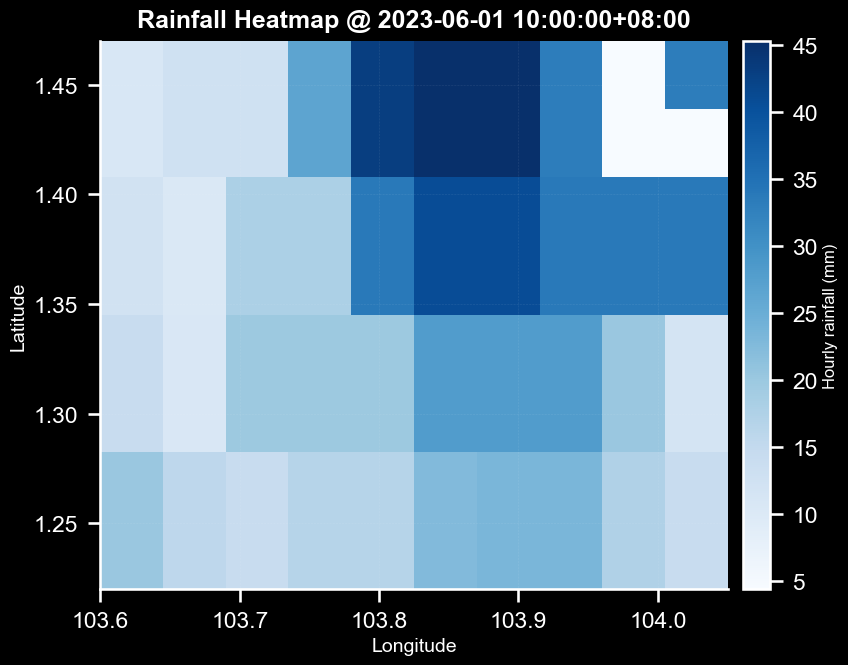

In [19]:
import numpy as np

# Extract lat/lon from column names (assumes "lat,lon" headers)
value_cols = [c for c in df.columns if "," in c]
lat_lon = [tuple(map(float, c.split(","))) for c in value_cols]
lats = sorted({lat for lat, _ in lat_lon})
lons = sorted({lon for _, lon in lat_lon})
n_lat, n_lon = len(lats), len(lons)
print("Grid shape:", n_lat, "x", n_lon)

# Pick the hour with peak mean rainfall and plot a heatmap
t_peak = df["mean_rainfall"].idxmax()
arr_peak = df.loc[t_peak, value_cols].values.reshape(n_lat, n_lon)

fig, ax = plt.subplots(figsize=(9,7))
hm = ax.imshow(
    arr_peak, origin="lower", aspect="auto",
    cmap="Blues",  # looks nice on dark background
    extent=[min(lons), max(lons), min(lats), max(lats)]
)
cbar = plt.colorbar(hm, ax=ax, pad=0.02)
cbar.set_label("Hourly rainfall (mm)", fontsize=12)

ax.set_title(f"Rainfall Heatmap @ {t_peak}", fontsize=18, weight="bold", pad=10)
ax.set_xlabel("Longitude", fontsize=14)
ax.set_ylabel("Latitude", fontsize=14)
ax.grid(color="white", linestyle=":", linewidth=0.4, alpha=0.2)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()

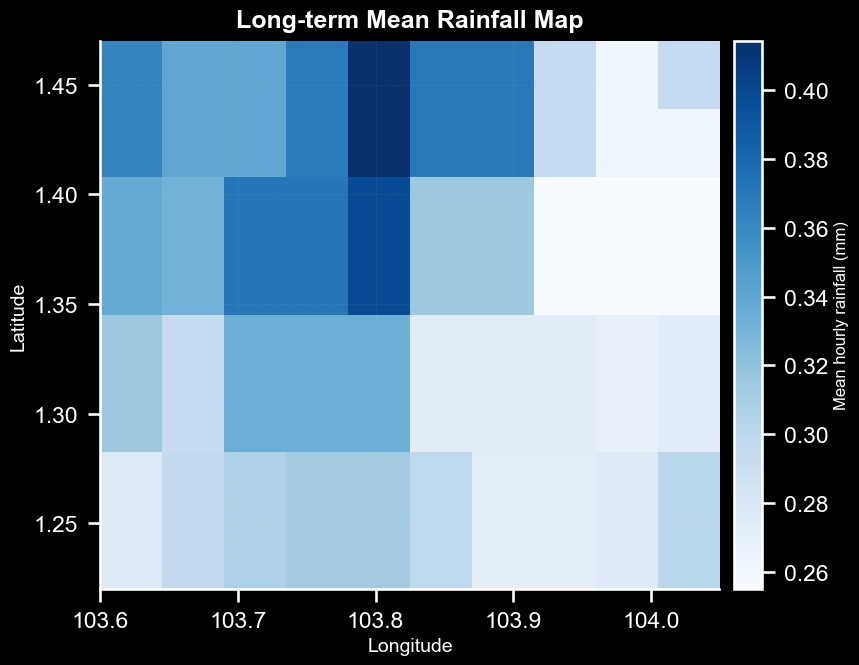

In [21]:
# Long-term mean rainfall map
arr_mean = df[value_cols].mean().values.reshape(n_lat, n_lon)

fig, ax = plt.subplots(figsize=(9,7))
hm2 = ax.imshow(
    arr_mean, origin="lower", aspect="auto",
    cmap="Blues",
    extent=[min(lons), max(lons), min(lats), max(lats)]
)
cbar2 = plt.colorbar(hm2, ax=ax, pad=0.02)
cbar2.set_label("Mean hourly rainfall (mm)", fontsize=12)

ax.set_title("Long-term Mean Rainfall Map", fontsize=18, weight="bold", pad=10)
ax.set_xlabel("Longitude", fontsize=14)
ax.set_ylabel("Latitude", fontsize=14)
ax.grid(color="white", linestyle=":", linewidth=0.4, alpha=0.2)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()


# Time Series at Selected Gridpoints

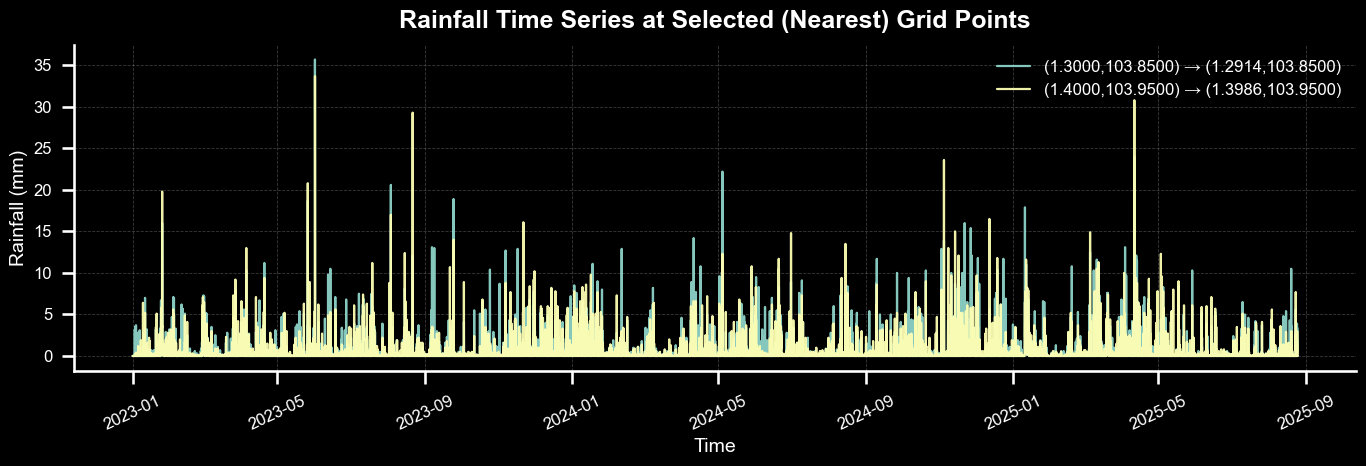

In [25]:
import numpy as np
plt.style.use("dark_background")

# 1) Parse available coordinates from columns (skip derived cols)
value_cols = [c for c in df.columns if "," in c]
coords = np.array([list(map(float, c.split(","))) for c in value_cols])
lats = sorted(set(coords[:, 0]))
lons = sorted(set(coords[:, 1]))

def nearest_grid_label(target_lat: float, target_lon: float):
    """
    Return (label, grid_lat, grid_lon) for the nearest available grid cell.
    Label matches the column name format: 'lat,lon' with 4 d.p.
    """
    lat = min(lats, key=lambda x: abs(x - target_lat))
    lon = min(lons, key=lambda x: abs(x - target_lon))
    return f"{lat:.4f},{lon:.4f}", lat, lon

# 2) Your requested points (can be any floats)
requested_points = [
    (1.3000, 103.8500),  # central-ish target
    (1.4000, 103.9500),  # east-ish target
]

# If you prefer automatic picks, comment the above and use:
# requested_points = [
#     (lats[len(lats)//2], lons[len(lons)//2]),  # center of grid
#     (lats[0],            lons[0]),             # SW corner
#     (lats[-1],           lons[-1]),            # NE corner
# ]

# 3) Map requested points to nearest available grid labels (dedup)
label_map = {}  # label -> (grid_lat, grid_lon, req_lat, req_lon)
for tlat, tlon in requested_points:
    label, glat, glon = nearest_grid_label(tlat, tlon)
    label_map[label] = (glat, glon, tlat, tlon)

# 4) Plot the time series
fig, ax = plt.subplots(figsize=(14,5))
for label, (glat, glon, tlat, tlon) in label_map.items():
    if label in df.columns:
        ax.plot(
            df.index, df[label],
            linewidth=1.6, alpha=0.95,
            label=f"({tlat:.4f},{tlon:.4f}) → ({glat:.4f},{glon:.4f})"
        )
    else:
        print(f"Unexpected: mapped column {label} not found; skipping.")

ax.set_title("Rainfall Time Series at Selected (Nearest) Grid Points",
             fontsize=18, weight="bold", pad=12)
ax.set_ylabel("Rainfall (mm)", fontsize=14)
ax.set_xlabel("Time", fontsize=14)
ax.grid(color="gray", linestyle="--", linewidth=0.6, alpha=0.45)
ax.tick_params(axis="x", labelsize=12, rotation=25)
ax.tick_params(axis="y", labelsize=12)
ax.legend(fontsize=12, frameon=False, loc="upper right")
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()

# Rainfall Extremes

In [23]:
# Top-N hours by mean rainfall
top_hours = df["mean_rainfall"].nlargest(5)
print("Top 5 hours by mean rainfall:")
print(top_hours)

Top 5 hours by mean rainfall:
timestamp
2023-06-01 10:00:00+08:00    44.955556
2023-06-01 09:00:00+08:00    40.496296
2024-05-04 13:00:00+08:00    30.785185
2025-04-11 09:00:00+08:00    30.523457
2023-08-21 11:00:00+08:00    30.251852
Name: mean_rainfall, dtype: float64


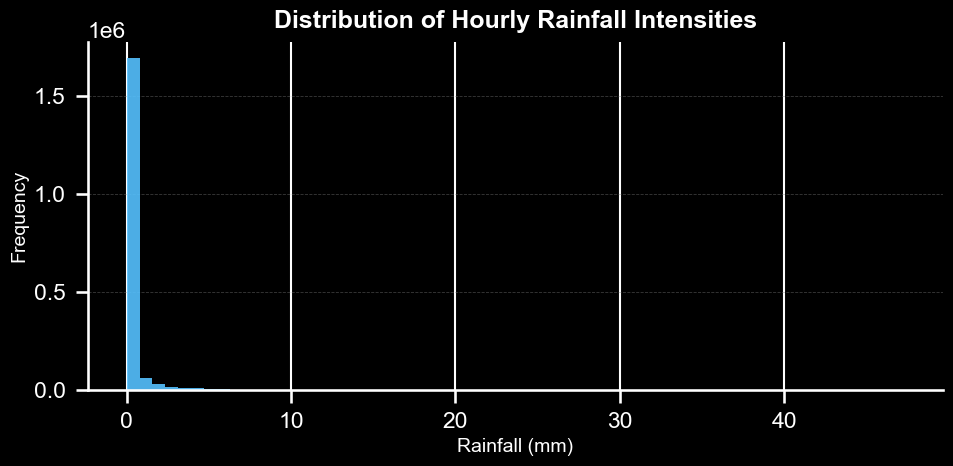

In [24]:
# Histogram of all rainfall values across space & time
vals = df[value_cols].values.astype(float).ravel()
vals = vals[np.isfinite(vals)]

fig, ax = plt.subplots(figsize=(10,5))
ax.hist(vals, bins=60, alpha=0.9, color="#55C1FF")
ax.set_title("Distribution of Hourly Rainfall Intensities", fontsize=18, weight="bold", pad=10)
ax.set_xlabel("Rainfall (mm)", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.grid(axis="y", color="gray", linestyle="--", linewidth=0.6, alpha=0.45)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()